In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
logxis = np.arange(-3,1.5,0.5)

# BB_TEMP in electron volts
BB_TEMP = 50.0
LOG_N = 9

# create arrays to hold line luminosities
c4 = np.zeros_like(logxis)
si4 = np.zeros_like(logxis)
n5 =  np.zeros_like(logxis)
he2 =  np.zeros_like(logxis)

for i, logxi in enumerate(logxis):
    root = "BB_{:.1f}_1858_n{:.1f}_xi{:.1f}".format(BB_TEMP, LOG_N, logxi)
    f = open(root + ".lines", "r")
    for line in f:
        data = line.split()
        if data[1] == "Blnd" and data[2] == "1397.00A":
            si4[i] = float(data[4]) 
        if data[1] == "Blnd" and data[2] == "1549.00A":
            c4[i] = float(data[4]) 
        if data[1] == "Blnd" and data[2] == "1240.00A":
            n5[i] = float(data[4])
        if data[1] == "He" and data[2] == "2" and data[3] == "1640.43A":
            he2[i] = float(data[5]) 

In [5]:
# array used to plot a 1:1 line 
logratios = np.linspace(-2.5,1,100)

# read in the Mauche data for comparison 
lxi_mauche, si4ratio_mauche, n5ratio_mauche, he2ratio_mauche = np.genfromtxt("mauche_data_50eV.dat", unpack=True)

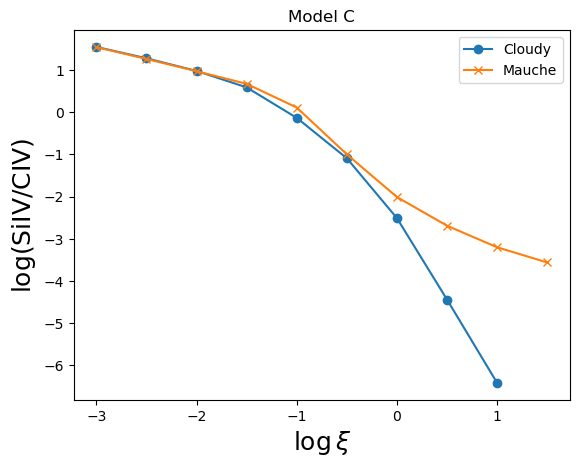

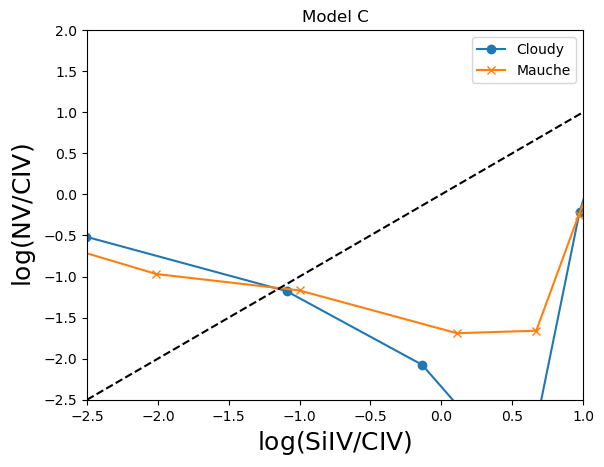

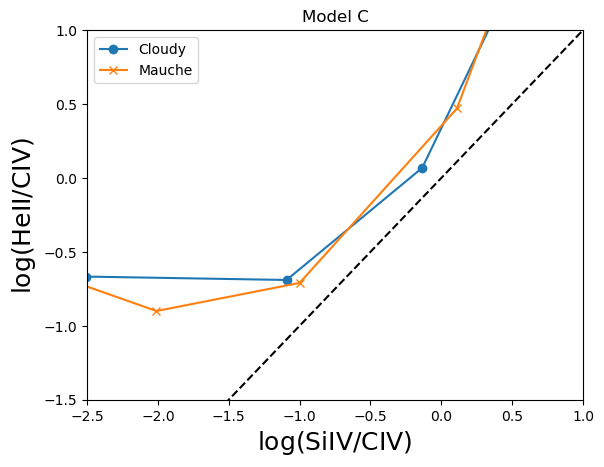

In [6]:
# make some figures 
plt.figure()
plt.title("Model C")
plt.plot(logxis,si4-c4, "-o", label="Cloudy",)
plt.plot(lxi_mauche,si4ratio_mauche,"-x", label = "Mauche")
plt.xlabel(r"$\log \xi$",fontsize=18)
plt.ylabel(r"$\log ({\rm Si IV / CIV})$",fontsize=18)
plt.legend()
plt.savefig("mauche_cld_comp_si4c4.png", dpi=300)

plt.figure()
plt.title("Model C")
plt.plot(si4-c4,n5-c4, "-o", label="Cloudy",)
plt.plot(si4ratio_mauche,n5ratio_mauche,"-x", label = "Mauche")
plt.ylabel(r"$\log ({\rm N V / CIV})$",fontsize=18)
plt.xlabel(r"$\log ({\rm Si IV / CIV})$",fontsize=18)
plt.plot(logratios,logratios, ls="--", c="k")
plt.legend()
plt.xlim(-2.5,1)
plt.ylim(-2.5,2)
plt.savefig("mauche_cld_comp_ratio1.png", dpi=300)

plt.figure()
plt.title("Model C")
plt.plot(si4-c4,he2-c4, "-o", label="Cloudy",)
plt.plot(si4ratio_mauche,he2ratio_mauche,"-x", label = "Mauche")
plt.plot(logratios,logratios, ls="--", c="k")
plt.xlim(-2.5,1)
plt.ylim(-1.5,1)
plt.ylabel(r"$\log ({\rm He II / CIV})$",fontsize=18)
plt.xlabel(r"$\log ({\rm Si IV / CIV})$",fontsize=18)
plt.legend()
plt.savefig("mauche_cld_comp_ratio2.png", dpi=300)